In [2]:
# -*- coding: utf-8 -*-
"""image_func.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ezS2gfDFzi1FeuzBbgHlooTjvZ7dVLN4
"""

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image

# Função para clarear a imagem
def clarear(imagem, fator):
    img_array = np.array(imagem)
    nova_imagem = np.clip(np.int32(imagem) + fator, 0, 255).astype(np.uint8)
    return nova_imagem

# Função para escurecer a imagem
def escurecer(imagem, fator):
    img_array = np.array(imagem)
    nova_imagem = nova_imagem = np.clip(np.int32(imagem) - fator, 0, 255).astype(np.uint8)
    return nova_imagem

def gama(img, gama, c):
  from PIL import Image
  import numpy as np

  img_n = (np.array(img).astype(np.int32))/255
  img_n = img_n ** gama
  img_n = img_n * 255
  img_n = np.clip(img_n*c, 0, 255)

  return img_n.astype(np.uint8)

def transformacao_log(img, c):
  from PIL import Image
  import numpy as np
  img = np.array(img).astype(np.int32)
  t_img = np.log1p(img)
  t_img = np.clip(t_img*c, 0, 255)

  return t_img.astype(np.uint8)

def equalizar_histograma(imagem):
    from PIL import Image
    import numpy as np

    img_array = np.array(imagem)
    hist, bins = np.histogram(img_array.flatten(), bins=256, range=(0, 255))
    cdf = hist.cumsum()
    cdf_normalizedo = (cdf - cdf.min())*255/(cdf.max() - cdf.min())
    #cdf_normalizedo = cdf * hist.max() / cdf.max()
    nova_imagem = np.interp(img_array.flatten(), np.arange(0, 256), cdf_normalizedo)
    #nova_imagem = np.interp(img_array.flatten(), bins[:-1], cdf_normalizedo)
    nova_imagem = nova_imagem.reshape(img_array.shape).astype(np.uint8)

    return nova_imagem



def suavizar_media(img, kernel):
    from PIL import Image
    import numpy as np
    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.int32)

    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = img[y_min:y_max, x_min:x_max]

        s_pixel = np.mean(k_s)

        s_img[y, x] = s_pixel

    return s_img.astype(np.uint8)

def suavizar_mediana(img, kernel):
    from PIL import Image
    import numpy as np
    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.int32)


    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = img[y_min:y_max, x_min:x_max]

        s_pixel = np.median(k_s)

        s_img[y, x] = s_pixel

    return s_img.astype(np.uint8)

def agucar_1(img, a):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

    img_a = np.convolve(img.flatten('C'), kernel.flatten('C'), mode='same').reshape(img.shape)

    img_a = np.int32(img) + a * (img_a - img)

    img_a = np.clip(img_a, 0, 255)

    return img_a.astype(np.uint8)

def detectar_bordas(imagem):
    from PIL import Image
    import numpy as np
    imagem = np.array(imagem)
    imagem_cinza = imagem


    filtro_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    gradiente_horizontal = np.abs(np.convolve(imagem_cinza.flatten('C'), filtro_horizontal.flatten('C'), mode='same').reshape(imagem.shape))


    filtro_vertical = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gradiente_vertical = np.abs(np.convolve(imagem_cinza.flatten('C'), filtro_vertical.flatten('C'), mode='same').reshape(imagem.shape))


    gradiente_total = np.sqrt(gradiente_horizontal**2 + gradiente_vertical**2)


    gradiente_normalizado = (gradiente_total / np.max(gradiente_total)) * 255
    #gradiente_normalizado = 255 - gradiente_normalizado

    return gradiente_normalizado.astype(np.uint8)

def agucar_2(imagem, a):
  from PIL import Image
  import numpy as np

  bordas = np.array(detectar_bordas(imagem))
  img = np.array(imagem)
  img_a = np.clip((np.int32(img) + a * np.int32(bordas)),0 ,255)

  return img_a.astype(np.uint8)

def agucar_3(img, a):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

    img_a = np.convolve(img.flatten('C'), kernel.flatten('C'), mode='same').reshape(img.shape)

    img_a = img_a + a * (img_a - img)

    img_a = np.clip(img_a, 0, 255)

    return img_a.astype(np.uint8)

#Filtro Passa Banda
def suavizar_f_passa_banda(img, fr, kind=0):
  import numpy as np
  from PIL import Image

  #Converte a imagem para numpy array
  img = np.array(img)

  #Realiza a tranformada de Fourier na imgagem (np.fft.fft2) e depois centraliza a imagem (np.fft.fftshift)
  img_t = np.fft.fftshift(np.fft.fft2(img))

  #Filtro Passa banda
  h, w = img.shape[0:2]
  #Kernel com as dimensões h e w da imagem original preenchidos com 1s próximo ao centro e 0s longe do centro
  # np.floor((w)/2) e np.floor((w)/2) encontram o centro da imagem
  # fr adiciona uma espessura horizontal e vertical
  # a ideia é criar uma cruz (+) na imagem, onde tudo dentro dessa região é preencido com 1 e tudo fora é preenchido com 0
  kernel = [[0 if (i >= np.floor((w)/2)+fr or i <= np.floor((w)/2)-fr)  and (j >= np.floor((h)/2)+fr or j <= np.floor((h)/2)-fr) else 1 for i in range (w)]for j in range(h)]

  #Multiplica a imagem transforada pelo kernel, anulando assim todas as informações fora da cruz (+) formada no kernel
  img_f = img_t * kernel

  #Retira a centralização (np.fft.ifftshift) da imagem fitrada (img_t * kernel) e depois realiza a transformada inversa na imagem (np.fft.ifft2)
  img_inv = np.fft.ifft2(np.fft.ifftshift(img_f))

  #Filtra apenas a parte real de cada pixel (np.real) e exclui os componentes imaginários na matriz
  #realce = img + r * np.real(img_inv)
  realce = np.real(img_inv)

  #Limita os valore da matriz realce a valores entre 0 e 255
  img_realce = np.clip(realce, 0, 255)

  #Escolhe o formato de saída da função.
  #Onde kind=1 retorna uma lista contendo a:
  #[0] imagem original (Image.fromarray(img))
  #[1] imagem no domínio da frequência - aplicação da transformada de Fourier na imagem original (Image.fromarray(img_t.astype(np.uint8))
  #[2] imagem no domínio da frequência com a aplicação do filtro (Image.fromarray(img_f.astype(np.uint8)))
  #[3] imagem final após a transformada inversa (Image.fromarray(img_realce.astype(np.uint8)))
  # Onde kind=0 retorna apenas a imagem final (default)
  if kind == 1:
    return [Image.fromarray(img), Image.fromarray(20*np.log(np.real(img_t)).astype(np.uint8)), Image.fromarray(20*np.log(np.real(img_f)).astype(np.uint8)), Image.fromarray(img_realce.astype(np.uint8))]
  elif kind == 0:
    return img_realce.astype(np.uint8)

#Suavizar Filtro Passa Baixa Ideal
def suavizar_f_passa_baixa_ideal(img, fr, kind=0):
  import numpy as np
  from PIL import Image

  #Converte a imagem para numpy array
  img = np.array(img)

  #Realiza a tranformada de Fourier na imgagem (np.fft.fft2) e depois centraliza a imagem (np.fft.fftshift)
  img_t = np.fft.fftshift(np.fft.fft2(img))

  #Filtro Passa Baixa ideal
  h, w = img.shape[0:2]
  #Kernel com as dimensões h e w da imagem original preenchidos com 1s próximo ao centro e 0s longe do centro
  # np.floor((w-1)/2) e np.floor((h-1)/2) encontram o centro da imagem
  # fr adiociona o raio com relação ao centro
  # a ideia é criar uma circunferência (o) na imagem, onde tudo dentro dessa região é preencido com 1 e tudo fora é preenchido com 0
  kernel = [[1 if ((((i-np.floor((w-1)/2))**2 + (j-np.floor((h-1)/2))**2)**(1/2)) <= fr) else 0 for i in range(w)]for j in range(h)]

  #Multiplica a imagem transforada pelo kernel, anulando assim todas as informações fora da cruz (+) formada no kernel
  img_f = img_t * kernel

  #Retira a centralização (np.fft.ifftshift) da imagem fitrada (img_t * kernel) e depois realiza a transformada inversa na imagem (np.fft.ifft2)
  img_inv = np.fft.ifft2(np.fft.ifftshift(img_f))

  #realce = img + r * np.real(img_inv)
  #Filtra apenas a parte real de cada pixel (np.real) e exclui os componentes imaginários na matriz
  realce = np.real(img_inv)

  #Limita os valore da matriz realce a valores entre 0 e 255
  img_realce = np.clip(realce, 0, 255)

  #Escolhe o formato de saída da função.
  #Onde kind=1 retorna uma lista contendo a:
  #[0] imagem original (Image.fromarray(img))
  #[1] imagem no domínio da frequência - aplicação da transformada de Fourier na imagem original (Image.fromarray(img_t.astype(np.uint8))
  #[2] imagem no domínio da frequência com a aplicação do filtro (Image.fromarray(img_f.astype(np.uint8)))
  #[3] imagem final após a transformada inversa (Image.fromarray(img_realce.astype(np.uint8)))
  # Onde kind=0 retorna apenas a imagem final (default)
  if kind == 1:
    return [Image.fromarray(img), Image.fromarray(np.log(np.abs(img_t)+1).astype(np.uint8)), Image.fromarray(np.log(np.abs(img_f)+1).astype(np.uint8)), Image.fromarray(img_realce.astype(np.uint8))]
  elif kind == 0:
    return img_realce.astype(np.uint8)

#Suavizar Filtro Passa Baixa de Butterworth
def suavizar_f_passa_baixa_B(img, fr, n, kind=0):
  import numpy as np
  from PIL import Image

  #Converte a imagem para numpy array
  img = np.array(img)

  #Realiza a tranformada de Fourier na imgagem (np.fft.fft2) e depois centraliza a imagem (np.fft.fftshift)
  img_t = np.fft.fftshift(np.fft.fft2(img))

  #Filtro Passa baixa de Butterworth
  h, w = img.shape[0:2]
  #Kernel com as dimensões h e w da imagem original
  # faz o cálculo da função de Butterworth com a função 1/(1+(fr/((i-(w-1)/2)**2 + (j-(h-1)/2)**2)**(1/2)))**(2*n)
  # usa 'if (np.abs(i-(w-1)/2) + np.abs(j-(h-1)/2)) != 0' para fugir da singularidade (divisão por 0) no centro da imagem
  # a ideia é criar uma circunferência (o) na imagem, onde quanto mais próximo do centro mais próximo a 0 e mais distante do centro mais próximo a 1
  # o n potencializa a variação dos números entre 0 e 1 de acordo com a distância para o centro
  kernel = [[1/(1+(fr/((i-(w-1)/2)**2 + (j-(h-1)/2)**2)**(1/2)))**(2*n) if (np.abs(i-(w-1)/2) + np.abs(j-(h-1)/2)) != 0 else 1 for i in range(w)]for j in range(h)]
  # inverte o kernel para aproximar de 1 os valores do centro de de 0 os valores distantes do centro
  kernel = 1 - np.array(kernel)

  #Multiplica a imagem transforada pelo kernel, anulando assim atenuando as informações longe do centro (0) formada no kernel
  img_f = img_t * kernel

  #Retira a centralização (np.fft.ifftshift) da imagem fitrada (img_t * kernel) e depois realiza a transformada inversa na imagem (np.fft.ifft2)
  img_inv = np.fft.ifft2(np.fft.ifftshift(img_f))

  #Filtra apenas a parte real de cada pixel (np.real) e exclui os componentes imaginários na matriz
  #realce = img + r * np.real(img_inv)
  realce = np.real(img_inv)

  #Limita os valore da matriz realce a valores entre 0 e 255
  img_realce = np.clip(realce, 0, 255)

  #Escolhe o formato de saída da função.
  #Onde kind=1 retorna uma lista contendo a:
  #[0] imagem original (Image.fromarray(img))
  #[1] imagem no domínio da frequência - aplicação da transformada de Fourier na imagem original (Image.fromarray(img_t.astype(np.uint8))
  #[2] imagem no domínio da frequência com a aplicação do filtro (Image.fromarray(img_f.astype(np.uint8)))
  #[3] imagem final após a transformada inversa (Image.fromarray(img_realce.astype(np.uint8)))
  # Onde kind=0 retorna apenas a imagem final (default)
  if kind == 1:
    return [Image.fromarray(img), Image.fromarray(np.log(np.abs(img_t)+1).astype(np.uint8)), Image.fromarray(np.log(np.abs(img_f)+1).astype(np.uint8)), Image.fromarray(img_realce.astype(np.uint8))]
  elif kind == 0:
    return img_realce.astype(np.uint8)

#Suavizar Filtro Passa Baixa Gaussiano
def suavizar_f_passa_baixa_G(img, sigma, kind=0):
  import numpy as np
  from PIL import Image

  #Converte a imagem para numpy array
  img = np.array(img)

  #Realiza a tranformada de Fourier na imgagem (np.fft.fft2) e depois centraliza a imagem (np.fft.fftshift)
  img_t = np.fft.fftshift(np.fft.fft2(img))

  #Filtro Passa Baixa Gaussiano
  h, w = img.shape[0:2]
  #Kernel com as dimensões h e w da imagem original
  # np.floor((w-1)/2) e np.floor((h-1)/2)) encontram o centro da imagem
  # faz o cálculo da função Gaussiana com a função '1-np.exp(-(((i-np.ceil((w-1)/2))**2 + (j-np.ceil((h-1)/2))**2))/(2*sigma**2)'
  # a ideia é criar uma circunferência (o) na imagem, onde quanto mais próximo do centro mais próximo a 0 e mais distante do centro mais próximo a 1
  # o sigma potencializa a variação dos números entre 0 e 1 de acordo com a distância para o centro
  kernel = [[1-np.exp(-(((i-np.floor((w-1)/2))**2 + (j-np.floor((h-1)/2))**2))/(2*sigma**2)) for i in range(w)]for j in range(h)]
  # inverte o kernel para aproximar de 1 os valores do centro de de 0 os valores distantes do centro
  kernel = 1 - np.array(kernel)

  #Multiplica a imagem transforada pelo kernel, anulando assim atenuando as informações longe do centro (o) formada no kernel
  img_f = img_t * kernel

  #Retira a centralização (np.fft.ifftshift) da imagem fitrada (img_t * kernel) e depois realiza a transformada inversa na imagem (np.fft.ifft2)
  img_inv = np.fft.ifft2(np.fft.ifftshift(img_f))

  #Filtra apenas a parte real de cada pixel (np.real) e exclui os componentes imaginários na matriz
  #realce = img + r * np.real(img_inv)
  realce = np.real(img_inv)

  #Limita os valore da matriz realce a valores entre 0 e 255
  img_realce = np.clip(realce, 0, 255)

  #Escolhe o formato de saída da função.
  #Onde kind=1 retorna uma lista contendo a:
  #[0] imagem original (Image.fromarray(img))
  #[1] imagem no domínio da frequência - aplicação da transformada de Fourier na imagem original (Image.fromarray(img_t.astype(np.uint8))
  #[2] imagem no domínio da frequência com a aplicação do filtro (Image.fromarray(img_f.astype(np.uint8)))
  #[3] imagem final após a transformada inversa (Image.fromarray(img_realce.astype(np.uint8)))
  # Onde kind=0 retorna apenas a imagem final (default)
  if kind == 1:
    return [Image.fromarray(img), Image.fromarray(np.log(np.abs(img_t)+1).astype(np.uint8)), Image.fromarray(np.log(np.abs(img_f)+1).astype(np.uint8)), Image.fromarray(img_realce.astype(np.uint8))]
  elif kind == 0:
    return img_realce.astype(np.uint8)

#Realce Filtro Passa Banda
def realce_f_passa_banda(img, fr, r, kind=0):
  import numpy as np
  from PIL import Image

  #Converte a imagem para numpy array
  img = np.array(img)

  #Realiza a tranformada de Fourier na imgagem (np.fft.fft2) e depois centraliza a imagem (np.fft.fftshift)
  img_t = np.fft.fftshift(np.fft.fft2(img))

  #Filtro Passa Banda
  h, w = img.shape[0:2]
  #Kernel com as dimensões h e w da imagem original preenchidos com 0s próximo ao centro e 1s longe do centro
  # np.floor((w)/2) e np.floor((w)/2) encontram o centro da imagem
  # fr adiciona uma espessura horizontal e vertical
  # a ideia é criar uma cruz (+) na imagem, onde tudo dentro dessa região é preencido com 0 e tudo fora é preenchido com 1
  kernel = [[1 if (i >= np.floor((w)/2)+fr or i <= np.floor((w)/2)-fr)  and (j >= np.floor((h)/2)+fr or j <= np.floor((h)/2)-fr) else 0 for i in range (w)]for j in range(h)]

  #Multiplica a imagem transforada pelo kernel, anulando assim todas as informações dentro da cruz (+) formada no kernel
  img_f = img_t * kernel

  #Retira a centralização (np.fft.ifftshift) da imagem fitrada (img_t * kernel) e depois realiza a transformada inversa na imagem (np.fft.ifft2)
  img_inv = np.fft.ifft2(np.fft.ifftshift(img_f))

  #Filtra apenas a parte real de cada pixel (np.real) e exclui os componentes imaginários na matriz
  #Aplica uma técnica de nitidez a imagem adicionando a imagem original (img) o valor da imagem passada pela técnica de filtragem multiplicada por um índice de reforço 'r'
  realce = img + r * np.real(img_inv)

  #Limita os valore da matriz realce a valores entre 0 e 255
  img_realce = np.clip(realce, 0, 255)

  #Escolhe o formato de saída da função.
  #Onde kind=1 retorna uma lista contendo a:
  #[0] imagem original (Image.fromarray(img))
  #[1] imagem no domínio da frequência - aplicação da transformada de Fourier na imagem original (Image.fromarray(img_t.astype(np.uint8))
  #[2] imagem no domínio da frequência com a aplicação do filtro (Image.fromarray(img_f.astype(np.uint8)))
  #[3] imagem final após a transformada inversa (Image.fromarray(img_realce.astype(np.uint8)))
  # Onde kind=0 retorna apenas a imagem final (default)
  if kind == 1:
    return [Image.fromarray(img), Image.fromarray(np.log(np.abs(img_t)+1).astype(np.uint8)), Image.fromarray(np.log(np.abs(img_f)+1).astype(np.uint8)), Image.fromarray(img_realce.astype(np.uint8))]
  elif kind == 0:
    return img_realce.astype(np.uint8)

#Realce Filtro Passa Alta Ideal
def realce_f_passa_alta_ideal(img, fr, r, kind=0):
  import numpy as np
  from PIL import Image

  #Converte a imagem para numpy array
  img = np.array(img)

  #Realiza a tranformada de Fourier na imgagem (np.fft.fft2) e depois centraliza a imagem (np.fft.fftshift)
  img_t = np.fft.fftshift(np.fft.fft2(img))

  #Filtro Passa Alta ideal
  h, w = img.shape[0:2]
  #Kernel com as dimensões h e w da imagem original preenchidos com 0s próximo ao centro e 1s longe do centro
  # floor((w-1)/2) e np.ceil((h-1)/2) encontram o centro da imagem
  # fr adiociona o raio com relação ao centro
  # a ideia é criar uma circunferência (o) na imagem, onde tudo dentro dessa região é preencido com 0 e tudo fora é preenchido com 1
  kernel = [[0 if ((((i-np.floor((w-1)/2))**2 + (j-np.floor((h-1)/2))**2)**(1/2)) <= fr) else 1 for i in range(w)]for j in range(h)]

  #Multiplica a imagem transforada pelo kernel, anulando assim todas as informações fora da cruz (+) formada no kernel
  img_f = img_t * kernel

  #Retira a centralização (np.fft.ifftshift) da imagem fitrada (img_t * kernel) e depois realiza a transformada inversa na imagem (np.fft.ifft2)
  img_inv = np.fft.ifft2(np.fft.ifftshift(img_f))

  #Filtra apenas a parte real de cada pixel (np.real) e exclui os componentes imaginários na matriz
  #Aplica uma técnica de nitidez a imagem adicionando a imagem original (img) o valor da imagem passada pela técnica de filtragem multiplicada por um índice de reforço 'r'
  realce = img + r * np.real(img_inv)

  #Limita os valore da matriz realce a valores entre 0 e 255
  img_realce = np.clip(realce, 0, 255)

  #Escolhe o formato de saída da função.
  #Onde kind=1 retorna uma lista contendo a:
  #[0] imagem original (Image.fromarray(img))
  #[1] imagem no domínio da frequência - aplicação da transformada de Fourier na imagem original (Image.fromarray(img_t.astype(np.uint8))
  #[2] imagem no domínio da frequência com a aplicação do filtro (Image.fromarray(img_f.astype(np.uint8)))
  #[3] imagem final após a transformada inversa (Image.fromarray(img_realce.astype(np.uint8)))
  # Onde kind=0 retorna apenas a imagem final (default)
  if kind == 1:
    return [Image.fromarray(img), Image.fromarray(np.log(np.abs(img_t)+1).astype(np.uint8)), Image.fromarray(np.log(np.abs(img_f)+1).astype(np.uint8)), Image.fromarray(img_realce.astype(np.uint8))]
  elif kind == 0:
    return img_realce.astype(np.uint8)

#Realce Filtro Passa Alta de Butterworth
def realce_f_passa_alta_B(img, fr, n, r, kind=0):
  import numpy as np
  from PIL import Image

  #Converte a imagem para numpy array
  img = np.array(img)

  #Realiza a tranformada de Fourier na imgagem (np.fft.fft2) e depois centraliza a imagem (np.fft.fftshift)
  img_t = np.fft.fftshift(np.fft.fft2(img))

  #Filtro Passa Alta de Butterworth
  h, w = img.shape[0:2]
  # faz o cálculo da função de Butterworth com a função 1/(1+(fr/((i-(w-1)/2)**2 + (j-(h-1)/2)**2)**(1/2)))**(2*n)
  # usa 'if (np.abs(i-(w-1)/2) + np.abs(j-(h-1)/2)) != 0' para fugir da singularidade (divisão por 0) no centro da imagem
  # a ideia é criar uma circunferência (o) na imagem, onde quanto mais próximo do centro mais próximo a 0 e mais distante do centro mais próximo a 1
  # o n potencializa a variação dos números entre 0 e 1 de acordo com a distância para o centro
  kernel = [[1/(1+(fr/((i-(w-1)/2)**2 + (j-(h-1)/2)**2)**(1/2)))**(2*n) if (np.abs(i-(w-1)/2) + np.abs(j-(h-1)/2)) != 0 else 0 for i in range(w)]for j in range(h)]

  #Multiplica a imagem transforada pelo kernel, anulando assim atenuando as informações longe do centro (0) formada no kernel
  img_f = img_t * kernel

  #Retira a centralização (np.fft.ifftshift) da imagem fitrada (img_t * kernel) e depois realiza a transformada inversa na imagem (np.fft.ifft2)
  img_inv = np.fft.ifft2(np.fft.ifftshift(img_f))

  #Filtra apenas a parte real de cada pixel (np.real) e exclui os componentes imaginários na matriz
  #Aplica uma técnica de nitidez a imagem adicionando a imagem original (img) o valor da imagem passada pela técnica de filtragem multiplicada por um índice de reforço 'r'
  realce = img + r * np.real(img_inv)

  #Limita os valore da matriz realce a valores entre 0 e 255
  img_realce = np.clip(realce, 0, 255)

  #Escolhe o formato de saída da função.
  #Onde kind=1 retorna uma lista contendo a:
  #[0] imagem original (Image.fromarray(img))
  #[1] imagem no domínio da frequência - aplicação da transformada de Fourier na imagem original (Image.fromarray(img_t.astype(np.uint8))
  #[2] imagem no domínio da frequência com a aplicação do filtro (Image.fromarray(img_f.astype(np.uint8)))
  #[3] imagem final após a transformada inversa (Image.fromarray(img_realce.astype(np.uint8)))
  # Onde kind=0 retorna apenas a imagem final (default)
  if kind == 1:
    return [Image.fromarray(img), Image.fromarray(np.log(np.abs(img_t)+1).astype(np.uint8)), Image.fromarray(np.log(np.abs(img_f)+1).astype(np.uint8)), Image.fromarray(img_realce.astype(np.uint8))]
  elif kind == 0:
    return img_realce.astype(np.uint8)

#Realce Filtro Passa Alta Gaussiano
def realce_f_passa_alta_G(img, sigma, r, kind=0):
  import numpy as np
  from PIL import Image

  #Converte a imagem para numpy array
  img = np.array(img)

  #Realiza a tranformada de Fourier na imgagem (np.fft.fft2) e depois centraliza a imagem (np.fft.fftshift)
  img_t = np.fft.fftshift(np.fft.fft2(img))

  #Filtro Passa Alta Gaussinao
  h, w = img.shape[0:2]
  # np.floor((w-1)/2) e np.floor((h-1)/2)) encontram o centro da imagem
  # faz o cálculo da função Gaussiana com a função '1-np.exp(-(((i-np.ceil((w-1)/2))**2 + (j-np.ceil((h-1)/2))**2))/(2*sigma**2)'
  # a ideia é criar uma circunferência (o) na imagem, onde quanto mais próximo do centro mais próximo a 0 e mais distante do centro mais próximo a 1
  # o sigma potencializa a variação dos números entre 0 e 1 de acordo com a distância para o centro
  kernel = [[1-np.exp(-(((i-np.floor((w-1)/2))**2 + (j-np.floor((h-1)/2))**2))/(2*sigma**2)) for i in range(w)]for j in range(h)]

  #Multiplica a imagem transforada pelo kernel, assim atenuando as informações próximas do centro (o) formada no kernel
  img_f = img_t * kernel

  #Retira a centralização (np.fft.ifftshift) da imagem fitrada (img_t * kernel) e depois realiza a transformada inversa na imagem (np.fft.ifft2)
  img_inv = np.fft.ifft2(np.fft.ifftshift(img_f))

  #Filtra apenas a parte real de cada pixel (np.real) e exclui os componentes imaginários na matriz
  #Aplica uma técnica de nitidez a imagem adicionando a imagem original (img) o valor da imagem passada pela técnica de filtragem multiplicada por um índice de reforço 'r'
  realce = img + r * np.real(img_inv)

  #Limita os valore da matriz realce a valores entre 0 e 255
  img_realce = np.clip(realce, 0, 255)

  #Escolhe o formato de saída da função.
  #Onde kind=1 retorna uma lista contendo a:
  #[0] imagem original (Image.fromarray(img))
  #[1] imagem no domínio da frequência - aplicação da transformada de Fourier na imagem original (Image.fromarray(img_t.astype(np.uint8))
  #[2] imagem no domínio da frequência com a aplicação do filtro (Image.fromarray(img_f.astype(np.uint8)))
  #[3] imagem final após a transformada inversa (Image.fromarray(img_realce.astype(np.uint8)))
  # Onde kind=0 retorna apenas a imagem final (default)
  if kind == 1:
    return [Image.fromarray(img), Image.fromarray(np.log(np.abs(img_t)+1).astype(np.uint8)), Image.fromarray(np.log(np.abs(img_f)+1).astype(np.uint8)), Image.fromarray(img_realce.astype(np.uint8))]
  elif kind == 0:
    return img_realce.astype(np.uint8)

def impulso_unipolar(img, p):
  import numpy as np
  from PIL import Image

  img = np.array(img)

  h = np.array(img) * np.random.binomial(1, (1-p), np.array(img).shape[0]*np.array(img).shape[1]).reshape((np.array(img).shape[0],np.array(img).shape[1]))

  return h.astype(np.uint8)

def impulso_bipolar(img, p):
  import numpy as np
  from PIL import Image

  img = np.array(img)

  s = np.array(img) * np.random.binomial(1, (1-p/2), np.array(img).shape[0]*np.array(img).shape[1]).reshape((np.array(img).shape[0],np.array(img).shape[1]))
  h = s + 255*np.random.binomial(1, (p/2), np.array(img).shape[0]*np.array(img).shape[1]).reshape((np.array(img).shape[0],np.array(img).shape[1]))

  return h.astype(np.uint8)

def ruido_gaussiano(img, mean, sigma):
  import numpy as np
  from PIL import Image

  img = np.array(img)

  s = np.array(img) + np.random.normal(mean,sigma, (np.array(img).shape[0],np.array(img).shape[1]))
  h = np.clip(s, 0, 255)

  return h.astype(np.uint8)

def suavizar_media(img, kernel):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.int32)

    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = img[y_min:y_max, x_min:x_max]

        s_pixel = np.mean(k_s)

        #s_img[y, x] = s_pixel

        #s_img[y, x] = img[y, x] - ((variância_do_ruído)/(np.std(k_s))) * (img[y, x] - np.mean(k_s))

        s_img[y, x] = s_pixel

    return s_img.astype(np.uint8)

def suavizar_minimo(img, kernel):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.int32)

    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = img[y_min:y_max, x_min:x_max]

        s_pixel = np.amin(k_s)

        #s_img[y, x] = s_pixel

        #s_img[y, x] = img[y, x] - ((variância_do_ruído)/(np.std(k_s))) * (img[y, x] - np.mean(k_s))

        s_img[y, x] = s_pixel

    return s_img.astype(np.uint8)

def suavizar_maximo(img, kernel):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.int32)

    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = img[y_min:y_max, x_min:x_max]

        s_pixel = np.amax(k_s)

        #s_img[y, x] = s_pixel

        #s_img[y, x] = img[y, x] - ((variância_do_ruído)/(np.std(k_s))) * (img[y, x] - np.mean(k_s))

        s_img[y, x] = s_pixel

    return s_img.astype(np.uint8)

def suavizar_mediana(img, kernel):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.int32)

    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = img[y_min:y_max, x_min:x_max]

        s_pixel = np.median(k_s)

        #s_img[y, x] = s_pixel

        #s_img[y, x] = img[y, x] - ((variância_do_ruído)/(np.std(k_s))) * (img[y, x] - np.mean(k_s))

        s_img[y, x] = s_pixel

    return s_img.astype(np.uint8)

def suavizar_m_geometrica(img, kernel):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.float64)

    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = img[y_min:y_max, x_min:x_max].flatten('C') ** (1/(kernel**2))
        s_pixel = img[y, x]
        for i in k_s:
          s_pixel = s_pixel * i

        s_pixel = s_pixel/img[y, x]
        #s_img[y, x] = s_pixel

        #s_img[y, x] = img[y, x] - ((variância_do_ruído)/(np.std(k_s))) * (img[y, x] - np.mean(k_s))

        s_img[y, x] = s_pixel

    return s_img.astype(np.uint8)

def suavizar_m_harmonica(img, kernel):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.float64)

    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = 1 / img[y_min:y_max, x_min:x_max]

        s_pixel = (kernel**2) / np.sum(k_s)

        #s_img[y, x] = s_pixel

        #s_img[y, x] = img[y, x] - ((variância_do_ruído)/(np.std(k_s))) * (img[y, x] - np.mean(k_s))

        s_img[y, x] = s_pixel

    return s_img.astype(np.uint8)

def suavizar_m_contraharmonica(img, kernel, q):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.float64)

    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = img[y_min:y_max, x_min:x_max]

        s_pixel = np.sum(k_s**(q+1))/np.sum(k_s**q)

        #s_img[y, x] = s_pixel

        #s_img[y, x] = img[y, x] - ((variância_do_ruído)/(np.std(k_s))) * (img[y, x] - np.mean(k_s))

        s_img[y, x] = s_pixel

    return s_img.astype(np.uint8)

def suavizar_adaptativo(img, kernel, variância_do_ruído):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.int32)

    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = img[y_min:y_max, x_min:x_max]

        #s_pixel = np.mean(k_s)

        #s_img[y, x] = s_pixel

        s_img[y, x] = img[y, x].astype(np.float64) - ((variância_do_ruído)/(np.std(k_s))) * (img[y, x].astype(np.float64) - np.mean(k_s))

        #s_img[y, x] = s_img[y, x]

    return s_img.astype(np.uint8)

def seg_simples(img, threshold, opcao='mascara'):
  from PIL import Image
  import numpy as np

  image = np.array(img)
  mascara = np.zeros(image.shape, dtype=np.uint8)
  mascara[image > threshold] = 255
  mascara = np.where(mascara == 255, True, False)
  image_mascara = np.where(mascara == True, image, 0)

  if opcao =='mascara':
    return mascara
  elif opcao =='imagem':
    return image_mascara

def segmentacao_otsu(imagem):
    import numpy as np

    imagem = np.array(imagem)
    histograma, _ = np.histogram(imagem.flatten(), bins=256, range=(0, 256))

    probabilidade = histograma / float(np.sum(histograma))

    media_cumulativa = np.cumsum(probabilidade)

    intensidade_cumulativa = np.cumsum(probabilidade * np.arange(256))

    media_total = intensidade_cumulativa[-1]
    epsilon = 1e-8
    #variancia_interclasses = (media_total * media_cumulativa - intensidade_cumulativa) ** 2 / (media_cumulativa * (media_total - intensidade_cumulativa) + epsilon)
    variancia_interclasses = (media_total * media_cumulativa - intensidade_cumulativa) ** 2 / (media_cumulativa * (1-media_cumulativa) + epsilon)

    limiar = np.argmax(variancia_interclasses)

    imagem_segmentada = np.where(imagem > limiar, 0, 255)

    return imagem_segmentada.astype(np.uint8), limiar

def seg_otsu(img, threshold):
  from PIL import Image
  import numpy as np

  image_array = np.array(img)
  histogram = np.histogram(image_array, bins=256)[0]
  threshold = np.where(histogram.cumsum() > (histogram.sum() * threshold))[0][0]
  binary_image = image_array > threshold

  return binary_image

def iou(mascara1, mascara2):
    # Calcula a interseção entre as máscaras
    intersecao = np.logical_and(mascara1, mascara2)

    # Calcula a união entre as máscaras
    uniao = np.logical_or(mascara1, mascara2)

    # Calcula o valor do IoU
    iou = np.sum(intersecao) / np.sum(uniao)

    return iou

def miou2(mascaras_verdadeiras, mascaras_preditas):
    # Verifica se as listas têm o mesmo tamanho
    if len(mascaras_verdadeiras) != len(mascaras_preditas):
        raise ValueError("As listas de máscaras devem ter o mesmo tamanho.")

    num_mascaras = len(mascaras_verdadeiras)
    iou_total = 0.0

    for i in range(num_mascaras):
        mascara_verdadeira = mascaras_verdadeiras[i]
        mascara_predita = mascaras_preditas[i]

        # Calcula a interseção entre as máscaras
        intersecao = np.logical_and(mascara_verdadeira, mascara_predita)

        # Calcula a união entre as máscaras
        uniao = np.logical_or(mascara_verdadeira, mascara_predita)

        # Calcula o valor do IoU para a máscara atual
        iou = np.sum(intersecao) / np.sum(uniao)

        # Adiciona o IoU ao total
        iou_total += iou

    # Calcula a média do IoU
    miou = iou_total / num_mascaras

    return miou

def fig_show(imgs, nomes, color='gray'):
  import numpy as np
  from matplotlib import pyplot as plt
  import matplotlib.image
  from PIL import Image

  w = 4
  h = 2
  fig = plt.figure(figsize=(25, 25))
  columns = 5
  rows = 1
  for i in range(1, len(imgs)+1):
      imagem = imgs[i-1]
      fig.add_subplot(rows, columns, i)
      plt.imshow(imagem, cmap= color)
      plt.title(nomes[i-1])
      plt.axis('off')
  plt.show()

def hist_show(imgs, nomes):
  import numpy as np
  from matplotlib import pyplot as plt
  import matplotlib.image
  from PIL import Image


  w = 4
  h = 2
  fig = plt.figure(figsize=(25, 5))
  columns = 5
  rows = 1
  for i in range(1, len(imgs)+1):
    imagem = imgs[i-1]
    fig.add_subplot(rows, columns, i)
    plt.hist(np.array(imagem).flatten(), bins=256, range=[0,256], color='black')
    plt.title(nomes[i-1])
    #plt.axis('off')
  plt.show()

In [3]:
def resolucao(img, nrows, ncolumns):
  import numpy as np
  img = np.array(img)
  nrows0 = len(img)
  ncolumns0 = len(img[0])
  return np.array([[ img[int(nrows0 * r / nrows)][int(ncolumns0 * c / ncolumns)] for c in range(ncolumns)] for r in range(nrows)])

def rgb_cinza(imagem_rgb):
    # Calcula a média ponderada das intensidades dos canais R, G e B
    imagem_cinza = np.dot(imagem_rgb[...,:3], [0.2989, 0.5870, 0.1140])

    # Arredonda e converte para valores inteiros (0-255)
    imagem_cinza = np.round(imagem_cinza).astype(np.uint8)

    return imagem_cinza

def gama(img, gama, c):
  from PIL import Image
  import numpy as np

  img_n = (np.array(img).astype(np.int32))/255
  img_n = img_n ** gama
  img_n = img_n * 255
  img_n = np.clip(img_n*c, 0, 255)

  return img_n.astype(np.uint8)

def equalizar_histograma(imagem):
    from PIL import Image
    import numpy as np

    img_array = np.array(imagem)
    hist, bins = np.histogram(img_array.flatten(), bins=256, range=(0, 255))
    cdf = hist.cumsum()
    cdf_normalizedo = (cdf - cdf.min())*255/(cdf.max() - cdf.min())
    #cdf_normalizedo = cdf * hist.max() / cdf.max()
    nova_imagem = np.interp(img_array.flatten(), np.arange(0, 256), cdf_normalizedo)
    #nova_imagem = np.interp(img_array.flatten(), bins[:-1], cdf_normalizedo)
    nova_imagem = nova_imagem.reshape(img_array.shape).astype(np.uint8)

    return nova_imagem

def suavizar_mediana(img, kernel):
    from PIL import Image
    import numpy as np
    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.int32)


    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = img[y_min:y_max, x_min:x_max]

        s_pixel = np.median(k_s)

        s_img[y, x] = s_pixel

    return s_img.astype(np.uint8)

def agucar_1(img, a):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

    img_a = np.convolve(img.flatten('C'), kernel.flatten('C'), mode='same').reshape(img.shape)

    img_a = np.int32(img) + a * (img_a - img)

    img_a = np.clip(img_a, 0, 255)

    return img_a.astype(np.uint8)

def detectar_bordas(imagem):
    from PIL import Image
    import numpy as np
    imagem = np.array(imagem)
    imagem_cinza = imagem


    filtro_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    gradiente_horizontal = np.abs(np.convolve(imagem_cinza.flatten('C'), filtro_horizontal.flatten('C'), mode='same').reshape(imagem.shape))


    filtro_vertical = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gradiente_vertical = np.abs(np.convolve(imagem_cinza.flatten('C'), filtro_vertical.flatten('C'), mode='same').reshape(imagem.shape))


    gradiente_total = np.sqrt(gradiente_horizontal**2 + gradiente_vertical**2)


    gradiente_normalizado = (gradiente_total / np.max(gradiente_total)) * 255
    #gradiente_normalizado = 255 - gradiente_normalizado

    return gradiente_normalizado.astype(np.uint8)

def suavizar_minimo(img, kernel):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.int32)

    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = img[y_min:y_max, x_min:x_max]

        s_pixel = np.amin(k_s)

        #s_img[y, x] = s_pixel

        #s_img[y, x] = img[y, x] - ((variância_do_ruído)/(np.std(k_s))) * (img[y, x] - np.mean(k_s))

        s_img[y, x] = s_pixel

    return s_img.astype(np.uint8)

def suavizar_maximo(img, kernel):
    from PIL import Image
    import numpy as np

    img = np.array(img)
    if kernel % 2 == 0:
      kernel = kernel + 1

    h, l = img.shape

    kernel_2 = kernel // 2

    s_img = np.zeros_like(img, dtype=np.int32)

    for y in range(h):
      for x in range(l):
        y_min = max(0, y - kernel_2)
        y_max = min(h, y + kernel_2 + 1)
        x_min = max(0, x - kernel_2)
        x_max = min(l, x + kernel_2 + 1)

        k_s = img[y_min:y_max, x_min:x_max]

        s_pixel = np.amax(k_s)

        #s_img[y, x] = s_pixel

        #s_img[y, x] = img[y, x] - ((variância_do_ruído)/(np.std(k_s))) * (img[y, x] - np.mean(k_s))

        s_img[y, x] = s_pixel

    return s_img.astype(np.uint8)

def seg_simples(img, threshold, opcao='mascara'):
  from PIL import Image
  import numpy as np

  image = np.array(img)
  mascara = np.zeros(image.shape, dtype=np.uint8)
  mascara[image > threshold] = 255
  mascara = np.where(mascara == 255, 255, 0)
  image_mascara = np.where(mascara == 255, image, 0)

  if opcao =='mascara':
    return mascara
  elif opcao =='imagem':
    return image_mascara

def fig_show(imgs, nomes, color='gray'):
  import numpy as np
  from matplotlib import pyplot as plt
  import matplotlib.image
  from PIL import Image

  w = 4
  h = 1
  fig = plt.figure(figsize=(25, 25))
  columns = 7
  rows = 1
  for i in range(1, len(imgs)+1):
      imagem = imgs[i-1]
      fig.add_subplot(rows, columns, i)
      plt.imshow(imagem, cmap= color)
      plt.title(nomes[i-1])
      plt.axis('off')
  plt.show()


#Realce Filtro Passa Alta Gaussiano
def realce_f_passa_alta_G(img, sigma, r, kind=0):
  import numpy as np
  from PIL import Image

  #Converte a imagem para numpy array
  img = np.array(img)

  #Realiza a tranformada de Fourier na imgagem (np.fft.fft2) e depois centraliza a imagem (np.fft.fftshift)
  img_t = np.fft.fftshift(np.fft.fft2(img))

  #Filtro Passa Alta Gaussinao
  h, w = img.shape[0:2]
  # np.floor((w-1)/2) e np.floor((h-1)/2)) encontram o centro da imagem
  # faz o cálculo da função Gaussiana com a função '1-np.exp(-(((i-np.ceil((w-1)/2))**2 + (j-np.ceil((h-1)/2))**2))/(2*sigma**2)'
  # a ideia é criar uma circunferência (o) na imagem, onde quanto mais próximo do centro mais próximo a 0 e mais distante do centro mais próximo a 1
  # o sigma potencializa a variação dos números entre 0 e 1 de acordo com a distância para o centro
  kernel = [[1-np.exp(-(((i-np.floor((w-1)/2))**2 + (j-np.floor((h-1)/2))**2))/(2*sigma**2)) for i in range(w)]for j in range(h)]

  #Multiplica a imagem transforada pelo kernel, assim atenuando as informações próximas do centro (o) formada no kernel
  img_f = img_t * kernel

  #Retira a centralização (np.fft.ifftshift) da imagem fitrada (img_t * kernel) e depois realiza a transformada inversa na imagem (np.fft.ifft2)
  img_inv = np.fft.ifft2(np.fft.ifftshift(img_f))

  #Filtra apenas a parte real de cada pixel (np.real) e exclui os componentes imaginários na matriz
  #Aplica uma técnica de nitidez a imagem adicionando a imagem original (img) o valor da imagem passada pela técnica de filtragem multiplicada por um índice de reforço 'r'
  realce = img + r * np.real(img_inv)

  #Limita os valore da matriz realce a valores entre 0 e 255
  img_realce = np.clip(realce, 0, 255)

  #Escolhe o formato de saída da função.
  #Onde kind=1 retorna uma lista contendo a:
  #[0] imagem original (Image.fromarray(img))
  #[1] imagem no domínio da frequência - aplicação da transformada de Fourier na imagem original (Image.fromarray(img_t.astype(np.uint8))
  #[2] imagem no domínio da frequência com a aplicação do filtro (Image.fromarray(img_f.astype(np.uint8)))
  #[3] imagem final após a transformada inversa (Image.fromarray(img_realce.astype(np.uint8)))
  # Onde kind=0 retorna apenas a imagem final (default)
  if kind == 1:
    return [Image.fromarray(img), Image.fromarray(np.log(np.abs(img_t)+1).astype(np.uint8)), Image.fromarray(np.log(np.abs(img_f)+1).astype(np.uint8)), Image.fromarray(img_realce.astype(np.uint8))]
  elif kind == 0:
    return img_realce.astype(np.uint8)

    
def img_teste1(img):

  img = resolucao(img, 256, 256)
  img = rgb_cinza(img)
  img = suavizar_minimo(img, 3)
  img = gama(img, 0.75, 1.2)
  img = agucar_1(img,1)
  img = realce_f_passa_alta_G(img,2,3)
  img = seg_simples(img, 150)

  return img


In [4]:
from sklearn.preprocessing import StandardScaler

def normalize_image_array(image_array):
    # Create a StandardScaler object
    scaler = StandardScaler()
    # Reshape the 1D image array to a 2D array with a single column
    reshaped_array = image_array.reshape(-1, 1)

    # Fit the scaler on the reshaped data and transform it
    normalized_array = scaler.fit_transform(reshaped_array)

    # Flatten the normalized array back to 1D
    normalized_1d_array = normalized_array.flatten()
    return normalized_1d_array

In [5]:
# Função para carregar e redimensionar imagens
def load_and_resize_image(image_path,teste_function):
    # Abrir a imagem usando o Pillow
    imagem = Image.open(image_path)

    # Converter a imagem para uma matriz NumPy
    imagem_array = np.array(imagem)
    plt.imshow(imagem_array,cmap="gray")
    plt.show()
    imagem_array = teste_function(imagem_array)
    plt.imshow(imagem_array,cmap="gray")
    plt.show()
    return imagem_array.flatten()

In [6]:
import csv
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib

def preprocess_and_classify_images_from_csv(csv_file, classification_model):
    image_paths = []
    true_labels = []

    with open(csv_file, 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Pula o cabeçalho do CSV

        for row in csv_reader:
            image_paths.append(row[0])  # Coluna do caminho da imagem
            true_labels.append(int(row[1]))  # Coluna do rótulo (assumindo que é um número inteiro)

    predicted_labels = []

    for image_path in image_paths:
        # Carrega e redimensiona a imagem usando a função load_and_resize_image
        image = load_and_resize_image(image_path,img_teste1)
        # Normaliza a imagem usando a função normalize
        # normalized_image = normalize_image_array(image)

        # Realiza a classificação usando o modelo de classificação fornecido
        predicted_class = classification_model.predict([image])
        print("CLASSE PREDITA: ",predicted_class)
        predicted_labels.append(predicted_class)

    # Calcula a matriz de confusão
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    print("Matriz de Confusão:")
    print(conf_matrix)

    class_names = ['Non Crack', 'Crack']  # Substitua pelas suas classes reais
    plot_confusion_matrix(conf_matrix, classes=class_names, normalize=False)
    plt.show()

    # Calcula as métricas de avaliação
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print("\nMétricas de Avaliação:")
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    return conf_matrix, accuracy, precision, recall, f1


In [8]:
best_model = joblib.load(f"./all_methods/best_model_Random Forest_img_teste2.joblib")
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de Confusão', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, "{:.2f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo Verdadeiro')
    plt.xlabel('Rótulo Previsto')

CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [1]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [0]
CLASSE PREDITA:  [0]
CLASSE PREDIT

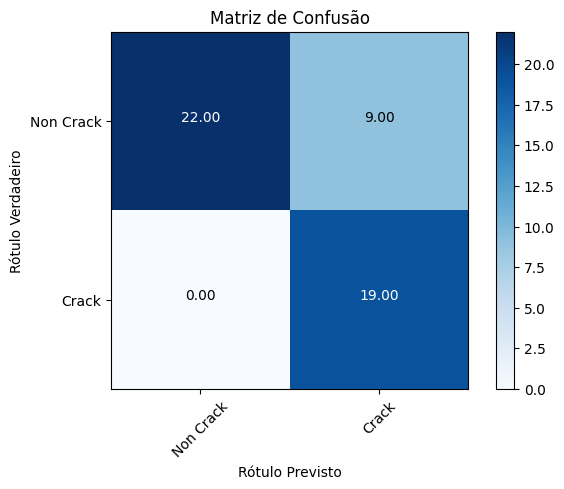


Métricas de Avaliação:
Acurácia: 0.82
Precisão: 0.8778571428571429
Recall: 0.82
F1-score: 0.8219510236852671


In [ ]:
csv_file = "./Testing.csv"
conf_matrix, accuracy, precision, recall, f1 = preprocess_and_classify_images_from_csv(csv_file, best_model)